In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv("covid_19_data.csv")

In [3]:
df

,SNo,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
29421,29422,05/25/2020,Yucatan,Mexico,26-05-2020 02:32,1522,123,1009
29422,29423,05/25/2020,Yukon,Canada,26-05-2020 02:32,11,0,11
29423,29424,05/25/2020,Yunnan,Mainland China,26-05-2020 02:32,185,2,183
29424,29425,05/25/2020,Zacatecas,Mexico,26-05-2020 02:32,243,28,161


In [4]:
df.drop(['SNo'],axis=1,inplace=True)
df.head()

,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [5]:
df.isnull().sum()

Date               0
Province       14899
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [6]:
#As lot of Province data is missing we will replace Province data with country wherever possible
df['Province'].fillna(df['Country'],inplace=True)

In [7]:
#displaying datatypes of columns 
df.dtypes

Date           object
Province       object
Country        object
Last Update    object
Confirmed       int64
Deaths          int64
Recovered       int64
dtype: object

In [8]:
#converting data type of 'Date' column from object to date 
df['Date']= pd.to_datetime(df['Date']) 
df.dtypes

Date           datetime64[ns]
Province               object
Country                object
Last Update            object
Confirmed               int64
Deaths                  int64
Recovered               int64
dtype: object

In [9]:
df['Date'].head(5)

0   2020-01-22
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
Name: Date, dtype: datetime64[ns]

In [10]:
#matrix representation of corr between numerical values
df.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.870558,0.476439
Deaths,0.870558,1.000000,0.383427
Recovered,0.476439,0.383427,1.000000


In [11]:
#find all Provinces from the dataframe
df['Province'].value_counts()

Diamond Princess cruise ship    187
Georgia                         167
Grand Princess                  144
Hebei                           127
Gansu                           127
                               ... 
Johnson County, IA                1
Jervis Bay Territory              1
Queens County, NY                 1
Travis, CA                        1
 Azerbaijan                       1
Name: Province, Length: 624, dtype: int64

In [12]:
#find all countries from the dataframe
df['Country'].value_counts()

US                     5338
Mainland China         3873
Canada                 1177
Australia               836
France                  818
                       ... 
North Ireland             1
St. Martin                1
Cape Verde                1
Republic of Ireland       1
Channel Islands           1
Name: Country, Length: 223, dtype: int64

In [13]:
#Extracting 'Day' and 'Month' from 'Date' 
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month

In [14]:
df.head(5)

,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered,Day,Month
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0,22,1
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0,22,1
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,22,1
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0,22,1
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0,22,1


In [15]:
perDay =pd.DataFrame()
perDay['Confirmed']=df.groupby(['Date'])['Confirmed'].sum()
perDay['Recovered']=df.groupby(['Date'])['Recovered'].sum()
perDay['Deaths']=df.groupby(['Date'])['Deaths'].sum()
perDay.head(5)

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,555,28,17
2020-01-23,653,30,18
2020-01-24,941,36,26
2020-01-25,1438,39,42
2020-01-26,2118,52,56


In [16]:
activeCases = pd.DataFrame()
activeCases['Active'] =  perDay.Confirmed-perDay.Recovered-perDay.Deaths
activeCases.head(5)

,Active
Date,
2020-01-22,510
2020-01-23,605
2020-01-24,879
2020-01-25,1357
2020-01-26,2010


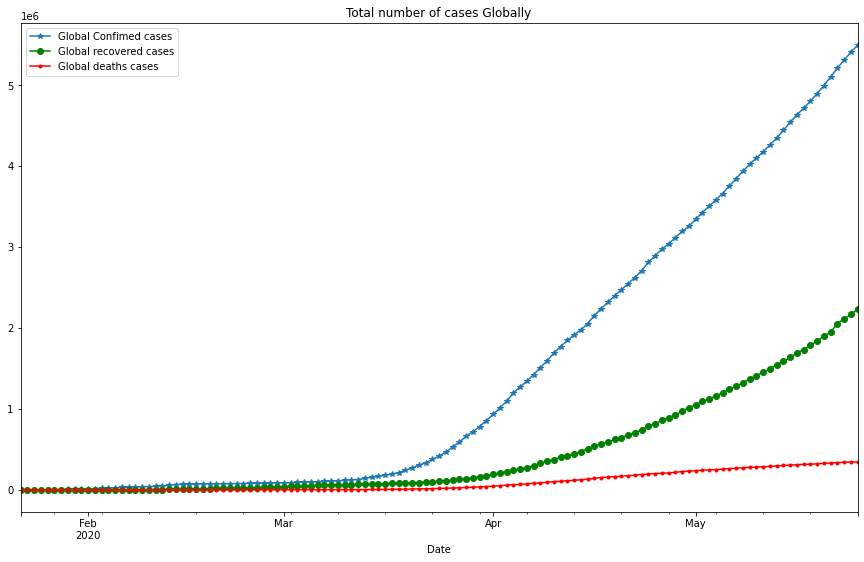

In [17]:
fig, ax = plt.subplots(figsize=(15,9))
perDay['Confirmed'].plot(ax=ax, marker='*',label='Global Confimed cases')
perDay['Recovered'].plot(ax=ax, marker='o',color='green',label = 'Global recovered cases')
perDay['Deaths'].plot(ax=ax, marker='.',color='red',label = 'Global deaths cases')
ax.legend()
plt.title("Total number of cases Globally")
plt.show()


In [18]:
#calculating per Day new Confirmed,Recovered,Deaths cases
perDay=perDay.diff()
perDay.fillna(0,inplace= True)

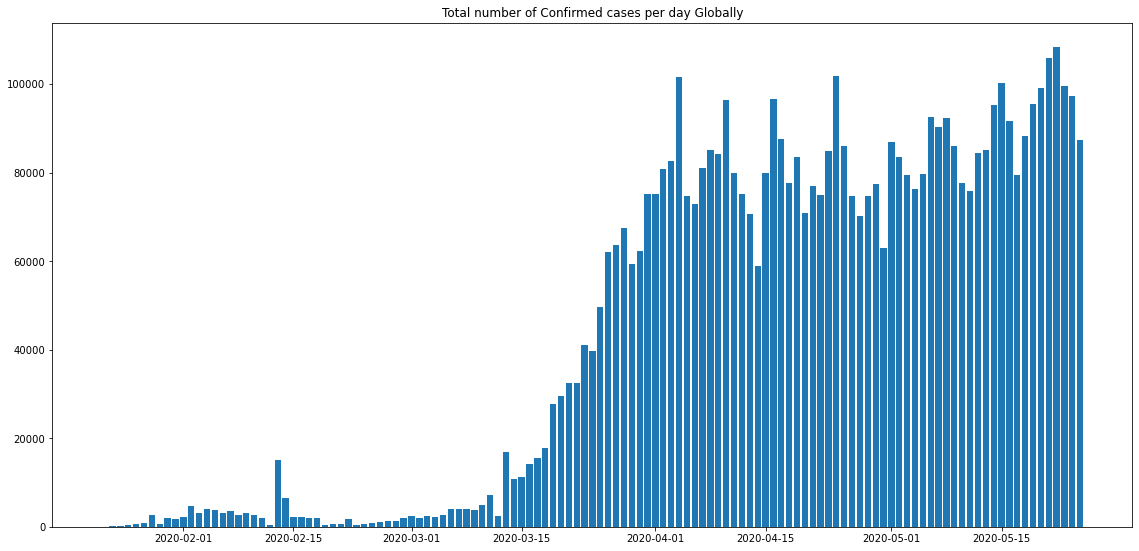

In [19]:
# Displaying time series data for new confirmed dataset
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(perDay.index,perDay.Confirmed)
plt.title("Total number of Confirmed cases per day Globally")
plt.show()

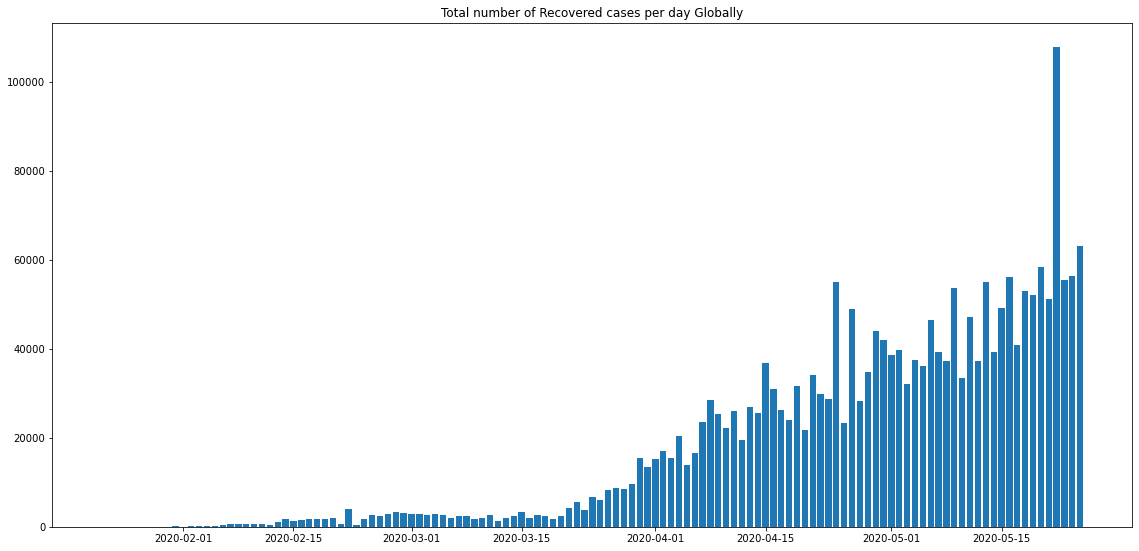

In [20]:
# Displaying time series data for new Recovered dataset
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(perDay.index,perDay.Recovered)
plt.title("Total number of Recovered cases per day Globally")
plt.show()

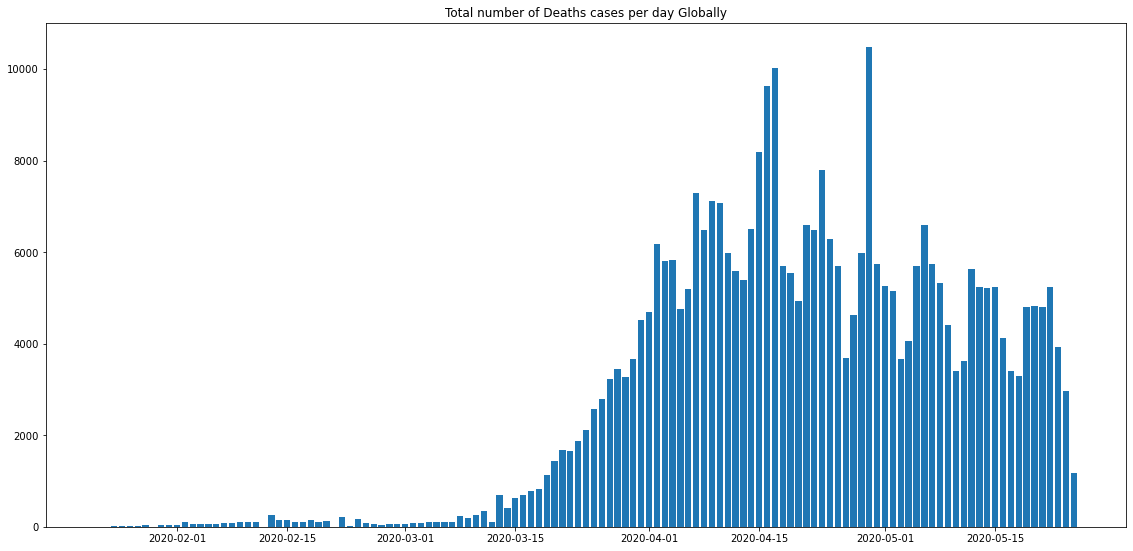

In [21]:
# Displaying time series data for new Deaths dataset
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(perDay.index,perDay.Deaths)
plt.title("Total number of Deaths cases per day Globally")
plt.show()

In [22]:
activeCases.head(5)

,Active
Date,
2020-01-22,510
2020-01-23,605
2020-01-24,879
2020-01-25,1357
2020-01-26,2010


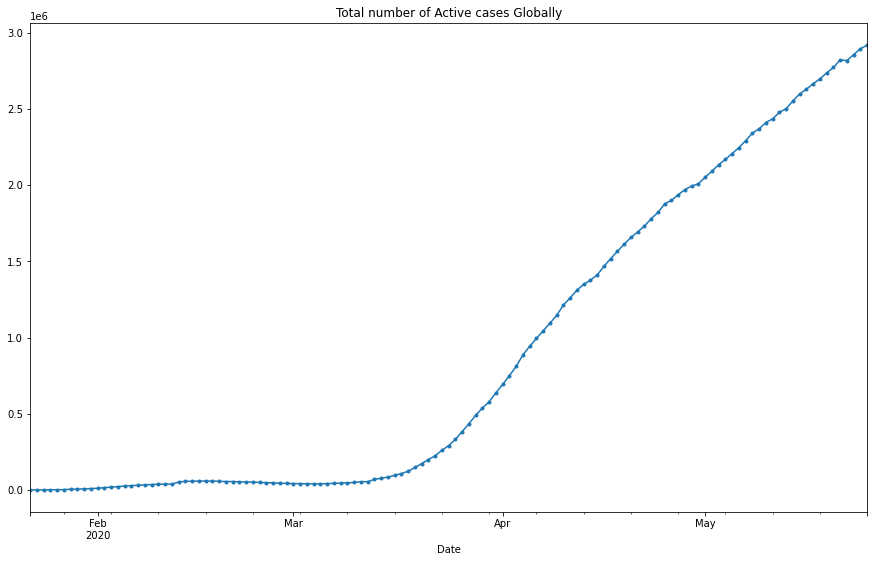

In [23]:
#displaying time series dataset for currently active cases globally
fig, ax = plt.subplots(figsize=(15,9))
activeCases.Active.plot(ax=ax, marker='.')
plt.title("Total number of Active cases Globally")
plt.show()

In [63]:
#search by country dataset
def country(countryName):
    confirmed = df.loc[df.Country == countryName].Confirmed
    recovered = df.loc[df.Country == countryName].Recovered
    deaths = df.loc[df.Country == countryName].Deaths
    return confirmed.iloc[-1],recovered.iloc[-1],deaths.iloc[-1]
    

In [64]:
print(country('India'))


(144950, 60706, 4172)


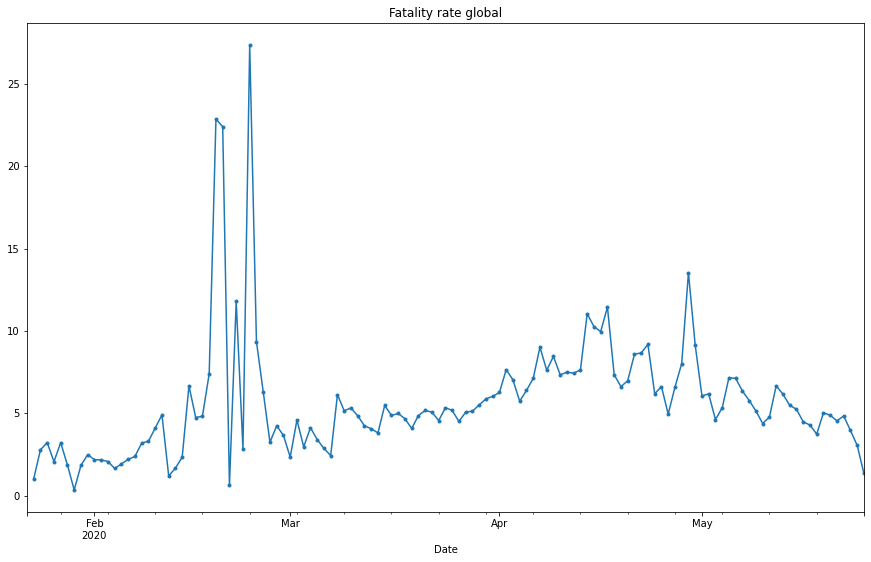

In [26]:
#Fatality rate graphical representaion
fig, ax = plt.subplots(figsize=(15,9))
(perDay.Deaths/perDay.Confirmed*100).plot(ax=ax, marker='.')
plt.title("Fatality rate global")
plt.show()

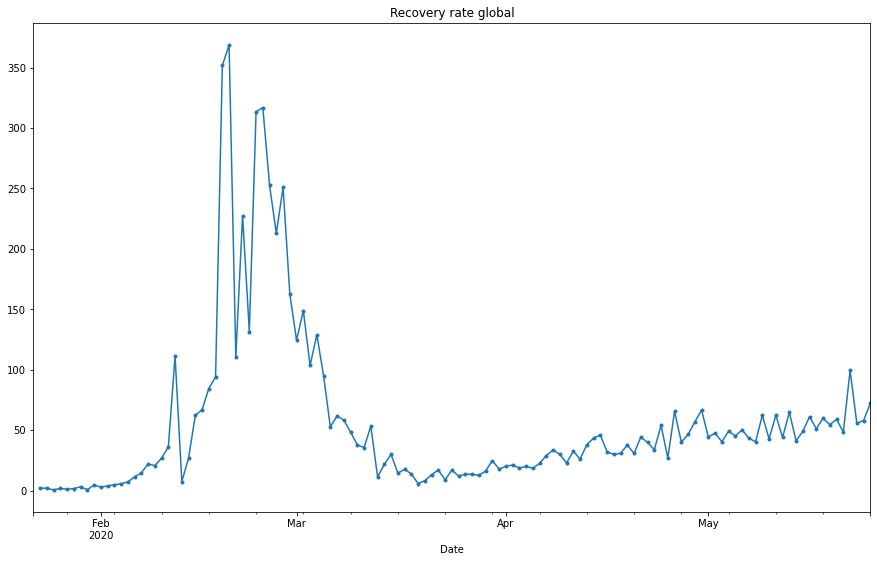

In [27]:
#Fatality rate graphical representaion
fig, ax = plt.subplots(figsize=(15,9))
(perDay.Recovered/perDay.Confirmed*100).plot(ax=ax, marker='.')
plt.title("Recovery rate global")
plt.show()